In [6]:
%load_ext autoreload
%autoreload 2

import astropy.units as u
import cmasher as cmr
import matplotlib.cm as cm
import numpy as np
from astropy.cosmology import FlatLambdaCDM
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.ticker import ScalarFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable

from EXPANSE import ResolvedGalaxies, ResolvedGalaxy
from EXPANSE.bagpipes import continuity_dict, create_dicts, resolved_dict_cnst

cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
plt.style.use('/nvme/scratch/work/tharvey/scripts/paper_scientific.mplstyle')
plt.rcParams["figure.dpi"] = 300

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Referee requests we test for systematic redshift offsets due to e.g. DLAs by refitting with model of Asada et al. 2024, as implemented in EAZY.

In [7]:
galaxies = ResolvedGalaxy.init_all_field_from_h5('JOF_psfmatched', '/nvme/scratch/work/tharvey/EXPANSE/galaxies/', n_jobs=6)

galaxies = ResolvedGalaxies(galaxies)

Found 222 galaxies in field JOF_psfmatched


Loading galaxies in parallel:   0%|          | 0/222 [00:00<?, ?it/s]

Loading galaxies in parallel: 100%|██████████| 222/222 [02:05<00:00,  1.77it/s]


In [18]:
for galaxy in galaxies:
    try:
        galaxy.eazy_fit_measured_photometry(phot_name='MAG_APER_0.32 arcsec',
                                            override_binmap_type='pixedfit',
                                            plot=False,
                                            overwrite=False,
                                            add_cgm=True,
                                            load_tempfilt=False,
                                            custom_append='_Asada24_cgm')
    except Exception as e:
        print(f"Error processing galaxy {galaxy.name}: {e}")
        continue



Output MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm already exists. Use overwrite=True to recompute.
Output MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm already exists. Use overwrite=True to recompute.
Output MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm already exists. Use overwrite=True to recompute.
Output MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm already exists. Use overwrite=True to recompute.
Output MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm already exists. Use overwrite=True to recompute.
Output MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm already exists. Use overwrite=True to recompute.
Output MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm already exists. Use overwrite=True to recompute.
Output MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm already exists. Use overwrite=True to recompute.
Output MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm already exists. Use overwrite=True to recompute.
Output MAG_APER_0.32 arcsec_fsps_lars

100%|██████████| 18/18 [00:11<00:00,  1.60it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 11.715 s


304it [00:00, 26965.03it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 4754.74it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.1653776
Setting meta, chi2, 23.203381248404973
Setting meta, z16, 6.1134014
Setting meta, z50, 6.1670604
Setting meta, z84, 6.2498674
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_12816.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_12816.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_12816.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec

100%|██████████| 18/18 [00:11<00:00,  1.53it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.274 s


304it [00:00, 26686.24it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5347.93it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.1706924
Setting meta, chi2, 25.284038841536013
Setting meta, z16, 6.1299295
Setting meta, z50, 6.1610804
Setting meta, z84, 6.2011666
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_12880.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_12880.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_12880.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec

100%|██████████| 18/18 [00:11<00:00,  1.53it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.220 s


304it [00:00, 22595.18it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5306.04it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 5.840781
Setting meta, chi2, 17.458423140633112
Setting meta, z16, 5.770674
Setting meta, z50, 5.855494
Setting meta, z84, 5.950074
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_13059.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_13059.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_13059.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsp

100%|██████████| 18/18 [00:12<00:00,  1.42it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 13.177 s


304it [00:00, 27021.03it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5959.35it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 9.223761
Setting meta, chi2, 13.587034822840568
Setting meta, z16, 9.11571
Setting meta, z50, 9.296109
Setting meta, z84, 9.565756
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_13097.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_13097.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_13097.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps

100%|██████████| 18/18 [00:12<00:00,  1.49it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.596 s


304it [00:00, 27310.41it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 4955.09it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 9.404525
Setting meta, chi2, 14.728931782265041
Setting meta, z16, 9.226982
Setting meta, z50, 9.543672
Setting meta, z84, 9.883346
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_13136.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_13136.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_13136.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsp

100%|██████████| 18/18 [00:12<00:00,  1.46it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.754 s


304it [00:00, 18169.84it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 6290.11it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.5 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 7.114011
Setting meta, chi2, 17.784129659360975
Setting meta, z16, 7.078939
Setting meta, z50, 7.2237816
Setting meta, z84, 7.4108295
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_13322.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_13322.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_13322.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_f

100%|██████████| 18/18 [00:11<00:00,  1.50it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.430 s


304it [00:00, 17473.87it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5475.59it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.1808057
Setting meta, chi2, 25.46065791257292
Setting meta, z16, 6.132467
Setting meta, z50, 6.192823
Setting meta, z84, 6.2939944
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_13330.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_13330.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_13330.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fs

100%|██████████| 18/18 [00:12<00:00,  1.47it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.729 s


304it [00:00, 16599.43it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 4930.77it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.5 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.3288865
Setting meta, chi2, 25.805131271886534
Setting meta, z16, 6.2698145
Setting meta, z50, 6.3381543
Setting meta, z84, 6.429452
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_13344.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_13344.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_13344.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_

100%|██████████| 18/18 [00:12<00:00,  1.42it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 13.133 s


304it [00:00, 26556.73it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 6421.67it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 5.9653625
Setting meta, chi2, 12.375429794887092
Setting meta, z16, 5.856169
Setting meta, z50, 5.9522104
Setting meta, z84, 6.00864
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_13349.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_13349.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_13349.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fs

100%|██████████| 18/18 [00:12<00:00,  1.43it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 13.069 s


304it [00:00, 23927.87it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 4341.03it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.5066323
Setting meta, chi2, 27.152208240958025
Setting meta, z16, 6.45203
Setting meta, z50, 6.5040503
Setting meta, z84, 6.547883
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_13358.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_13358.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_13358.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fs

100%|██████████| 18/18 [00:12<00:00,  1.41it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 13.246 s


304it [00:00, 27192.76it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 4957.77it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.127081
Setting meta, chi2, 23.332767195385202
Setting meta, z16, 5.824668
Setting meta, z50, 6.0621347
Setting meta, z84, 6.2244887
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_13434.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_13434.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_13434.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_f

100%|██████████| 18/18 [00:12<00:00,  1.44it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.963 s


304it [00:00, 15111.03it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5025.24it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 7.024899
Setting meta, chi2, 18.269596373290327
Setting meta, z16, 6.9859343
Setting meta, z50, 7.0307145
Setting meta, z84, 7.084504
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_13665.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_13665.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_13665.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_f

100%|██████████| 18/18 [00:12<00:00,  1.47it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.728 s


304it [00:00, 21639.57it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 4541.65it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 1.0630876
Setting meta, chi2, 72.50003850049188
Setting meta, z16, 1.0456496
Setting meta, z50, 1.2028725
Setting meta, z84, 2.1573634
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_13728.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_13728.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_13728.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_

100%|██████████| 18/18 [00:11<00:00,  1.50it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.451 s


304it [00:00, 27718.88it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5419.41it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.3160915
Setting meta, chi2, 14.46606336934436
Setting meta, z16, 6.2273583
Setting meta, z50, 6.324472
Setting meta, z84, 6.4270763
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_1381.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_1381.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_1381.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps

100%|██████████| 18/18 [00:11<00:00,  1.50it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.452 s


304it [00:00, 23123.36it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5538.29it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 5.2129745
Setting meta, chi2, 28.956180487735573
Setting meta, z16, 5.166479
Setting meta, z50, 5.2124157
Setting meta, z84, 5.2450457
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_13892.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_13892.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_13892.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_

100%|██████████| 18/18 [00:11<00:00,  1.53it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.193 s


304it [00:00, 26256.51it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5295.46it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.0030484
Setting meta, chi2, 42.75336797731866
Setting meta, z16, 5.966899
Setting meta, z50, 6.000707
Setting meta, z84, 6.027015
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_13912.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_13912.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_13912.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsp

100%|██████████| 18/18 [00:12<00:00,  1.49it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.528 s


304it [00:00, 29453.43it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 4905.56it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.7163873
Setting meta, chi2, 65.32114223364452
Setting meta, z16, 6.6950397
Setting meta, z50, 6.713697
Setting meta, z84, 6.7333536
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_13921.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_13921.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_13921.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_f

100%|██████████| 18/18 [00:12<00:00,  1.49it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.543 s


304it [00:00, 20308.49it/s]


Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/


100%|██████████| 304/304 [00:00<00:00, 6021.35it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.175025
Setting meta, chi2, 21.906081879805043
Setting meta, z16, 6.1314297
Setting meta, z50, 6.171408
Setting meta, z84, 6.2235947
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_1393.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_1393.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_1393.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps

100%|██████████| 18/18 [00:12<00:00,  1.49it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.520 s


304it [00:00, 27558.92it/s]


Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/


100%|██████████| 304/304 [00:00<00:00, 4817.07it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.7363253
Setting meta, chi2, 36.277319725831106
Setting meta, z16, 6.7072854
Setting meta, z50, 6.736331
Setting meta, z84, 6.763896
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_14185.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_14185.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_14185.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_f

100%|██████████| 18/18 [00:11<00:00,  1.53it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.229 s


304it [00:00, 28456.27it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5211.91it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.3285384
Setting meta, chi2, 26.841261071648077
Setting meta, z16, 6.092555
Setting meta, z50, 6.3045864
Setting meta, z84, 6.507785
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_14194.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_14194.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_14194.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_f

100%|██████████| 18/18 [00:12<00:00,  1.49it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.580 s


304it [00:00, 24985.66it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5544.35it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.039291
Setting meta, chi2, 13.198924694306472
Setting meta, z16, 5.994485
Setting meta, z50, 6.04212
Setting meta, z84, 6.0801044
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_14307.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_14307.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_14307.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsp

100%|██████████| 18/18 [00:12<00:00,  1.45it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.898 s


304it [00:00, 22382.97it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 4690.72it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 4.537729
Setting meta, chi2, 20.278921758460708
Setting meta, z16, 4.480731
Setting meta, z50, 4.536349
Setting meta, z84, 4.5879965
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_1438.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_1438.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_1438.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_

100%|██████████| 18/18 [00:12<00:00,  1.46it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.777 s


304it [00:00, 18241.06it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 4653.79it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 4.6275005
Setting meta, chi2, 14.661999164749894
Setting meta, z16, 4.618627
Setting meta, z50, 4.6352577
Setting meta, z84, 4.6488237
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_14386.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_14386.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_14386.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_

100%|██████████| 18/18 [00:12<00:00,  1.48it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.620 s


304it [00:00, 27435.58it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5020.01it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 4.578727
Setting meta, chi2, 49.88168060351242
Setting meta, z16, 4.552129
Setting meta, z50, 4.582313
Setting meta, z84, 4.608767
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_14524.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_14524.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_14524.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps

100%|██████████| 18/18 [00:12<00:00,  1.49it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.551 s


304it [00:00, 26165.45it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 6087.84it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 7.4878025
Setting meta, chi2, 32.19542405581174
Setting meta, z16, 7.1860485
Setting meta, z50, 7.4207025
Setting meta, z84, 7.5343757
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_14708.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_14708.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_14708.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_

100%|██████████| 18/18 [00:12<00:00,  1.49it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.579 s


304it [00:00, 26314.49it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5765.11it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.8008914
Setting meta, chi2, 12.694045504186574
Setting meta, z16, 6.7677593
Setting meta, z50, 6.8010654
Setting meta, z84, 6.8389335
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_14747.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_14747.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_14747.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec

100%|██████████| 18/18 [00:11<00:00,  1.54it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.147 s


304it [00:00, 17903.99it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 4622.66it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.008887
Setting meta, chi2, 42.66401705940855
Setting meta, z16, 5.817012
Setting meta, z50, 5.990828
Setting meta, z84, 6.040545
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_14940.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_14940.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_14940.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps

100%|██████████| 18/18 [00:12<00:00,  1.47it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.643 s


304it [00:00, 26518.07it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 3866.13it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.7332273
Setting meta, chi2, 15.745230053762853
Setting meta, z16, 6.6987233
Setting meta, z50, 6.732875
Setting meta, z84, 6.766509
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_14982.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_14982.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_14982.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_f

100%|██████████| 18/18 [00:12<00:00,  1.38it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 13.453 s


304it [00:00, 22982.07it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5200.62it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 9.388197
Setting meta, chi2, 25.93990319106453
Setting meta, z16, 9.371393
Setting meta, z50, 9.842659
Setting meta, z84, 10.210176
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_15021.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_15021.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_15021.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsp

100%|██████████| 18/18 [00:12<00:00,  1.46it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.775 s


304it [00:00, 25694.59it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 4890.32it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.668941
Setting meta, chi2, 26.596678195822754
Setting meta, z16, 6.5704207
Setting meta, z50, 6.6581044
Setting meta, z84, 6.7250824
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_15099.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_15099.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_15099.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_

100%|██████████| 18/18 [00:12<00:00,  1.48it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.633 s


304it [00:00, 17392.59it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5100.74it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 11.295368
Setting meta, chi2, 32.10670666110473
Setting meta, z16, 10.630779
Setting meta, z50, 11.209354
Setting meta, z84, 11.507151
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_15149.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_15149.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_15149.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_

100%|██████████| 18/18 [00:11<00:00,  1.53it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.212 s


304it [00:00, 22749.58it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5418.72it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 0.040276773
Setting meta, chi2, 62.29813031127451
Setting meta, z16, 0.023637531
Setting meta, z50, 0.04221561
Setting meta, z84, 0.06314936
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_15156.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_15156.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_15156.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 a

100%|██████████| 18/18 [00:10<00:00,  1.70it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 11.020 s


304it [00:00, 18328.90it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 6178.50it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 7.3702807
Setting meta, chi2, 10.882409821937053
Setting meta, z16, 7.2718043
Setting meta, z50, 7.370216
Setting meta, z84, 7.462991
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_15198.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_15198.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_15198.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_f

100%|██████████| 18/18 [00:12<00:00,  1.45it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.809 s


304it [00:00, 21662.00it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5072.46it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 5.8896885
Setting meta, chi2, 22.53255800522413
Setting meta, z16, 5.7440796
Setting meta, z50, 5.872864
Setting meta, z84, 5.9808908
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_1542.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_1542.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_1542.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps

100%|██████████| 18/18 [00:10<00:00,  1.68it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 11.135 s


304it [00:00, 26982.15it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5518.27it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 8.492884
Setting meta, chi2, 4.663835618634701
Setting meta, z16, 8.378462
Setting meta, z50, 8.497075
Setting meta, z84, 8.623092
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_15476.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_15476.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_15476.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps

100%|██████████| 18/18 [00:10<00:00,  1.73it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 10.859 s


304it [00:00, 16532.06it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 4296.54it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 8.006568
Setting meta, chi2, 17.006723873309763
Setting meta, z16, 7.8453016
Setting meta, z50, 8.002926
Setting meta, z84, 8.157974
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_15589.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_15589.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_15589.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fs

100%|██████████| 18/18 [00:11<00:00,  1.53it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.202 s


304it [00:00, 27083.02it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 4688.63it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 4.5479074
Setting meta, chi2, 24.228033598193456
Setting meta, z16, 4.4920826
Setting meta, z50, 4.5488353
Setting meta, z84, 4.60554
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_16.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_16.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_16.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larso

100%|██████████| 18/18 [00:10<00:00,  1.66it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 11.329 s


304it [00:00, 27235.74it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 4529.70it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 8.32063
Setting meta, chi2, 16.824149241481773
Setting meta, z16, 7.968128
Setting meta, z50, 8.246163
Setting meta, z84, 8.483125
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_16028.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_16028.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_16028.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps

100%|██████████| 18/18 [00:12<00:00,  1.49it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.565 s


304it [00:00, 26370.00it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 4860.00it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 4.5870624
Setting meta, chi2, 51.97887160836806
Setting meta, z16, 4.563155
Setting meta, z50, 4.587089
Setting meta, z84, 4.6110215
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_1623.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_1623.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_1623.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_

100%|██████████| 18/18 [00:12<00:00,  1.47it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.680 s


304it [00:00, 22648.56it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 6276.24it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 8.403584
Setting meta, chi2, 5.3131639614985
Setting meta, z16, 8.254739
Setting meta, z50, 8.389681
Setting meta, z84, 8.506209
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_1685.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_1685.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_1685.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_lars

100%|██████████| 18/18 [00:11<00:00,  1.52it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.257 s


304it [00:00, 19396.22it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5102.25it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 7.830814
Setting meta, chi2, 33.11113478567091
Setting meta, z16, 7.7152476
Setting meta, z50, 7.897767
Setting meta, z84, 8.1206045
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_1694.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_1694.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_1694.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_

100%|██████████| 18/18 [00:11<00:00,  1.51it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.346 s


304it [00:00, 25826.26it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 4878.16it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 5.979604
Setting meta, chi2, 24.68284744640544
Setting meta, z16, 5.872243
Setting meta, z50, 5.963923
Setting meta, z84, 6.0228477
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_1723.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_1723.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_1723.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_l

100%|██████████| 18/18 [00:11<00:00,  1.56it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 11.977 s


304it [00:00, 26264.08it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5129.51it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.186365
Setting meta, chi2, 22.39657904578417
Setting meta, z16, 6.1432276
Setting meta, z50, 6.2027426
Setting meta, z84, 6.3278246
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_1755.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_1755.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_1755.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps

100%|██████████| 18/18 [00:12<00:00,  1.46it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.796 s


304it [00:00, 23982.78it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5543.10it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.047386
Setting meta, chi2, 48.52395178216163
Setting meta, z16, 5.9489822
Setting meta, z50, 6.0637355
Setting meta, z84, 6.2092233
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_1867.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_1867.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_1867.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps

100%|██████████| 18/18 [00:12<00:00,  1.49it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.568 s


304it [00:00, 21920.44it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 4747.76it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 5.96353
Setting meta, chi2, 36.940674472434345
Setting meta, z16, 5.7795334
Setting meta, z50, 5.912719
Setting meta, z84, 6.018158
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_1951.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_1951.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_1951.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_l

100%|██████████| 18/18 [00:12<00:00,  1.46it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.743 s


304it [00:00, 26885.43it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5415.32it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.234944
Setting meta, chi2, 20.99310326656434
Setting meta, z16, 6.0185843
Setting meta, z50, 6.2039924
Setting meta, z84, 6.363394
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_1991.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_1991.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_1991.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_

100%|██████████| 18/18 [00:12<00:00,  1.46it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.720 s


304it [00:00, 24923.15it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5611.13it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.03422
Setting meta, chi2, 22.152363061655873
Setting meta, z16, 5.9772034
Setting meta, z50, 6.1399016
Setting meta, z84, 6.3311644
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_2015.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_2015.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_2015.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps

100%|██████████| 18/18 [00:12<00:00,  1.45it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.867 s


304it [00:00, 22862.98it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5934.14it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 8.199822
Setting meta, chi2, 7.0643762384046145
Setting meta, z16, 8.076909
Setting meta, z50, 8.197149
Setting meta, z84, 8.314113
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_2171.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_2171.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_2171.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_l

100%|██████████| 18/18 [00:12<00:00,  1.46it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.766 s


304it [00:00, 24824.65it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5204.59it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 8.683268
Setting meta, chi2, 19.75054433534144
Setting meta, z16, 8.552815
Setting meta, z50, 8.69432
Setting meta, z84, 8.851104
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_2267.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_2267.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_2267.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_lar

100%|██████████| 18/18 [00:11<00:00,  1.51it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.393 s


304it [00:00, 27345.55it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5817.74it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.183129
Setting meta, chi2, 38.98015164221952
Setting meta, z16, 6.120431
Setting meta, z50, 6.1875806
Setting meta, z84, 6.26749
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_2393.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_2393.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_2393.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_la

100%|██████████| 18/18 [00:12<00:00,  1.48it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.614 s


304it [00:00, 16554.17it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5641.67it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 7.967767
Setting meta, chi2, 54.283872865789036
Setting meta, z16, 7.841169
Setting meta, z50, 8.05818
Setting meta, z84, 8.308234
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_2398.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_2398.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_2398.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_la

100%|██████████| 18/18 [00:12<00:00,  1.49it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.481 s


304it [00:00, 28420.75it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5221.30it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.43609
Setting meta, chi2, 17.632205019513734
Setting meta, z16, 6.3017077
Setting meta, z50, 6.416069
Setting meta, z84, 6.513631
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_2439.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_2439.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_2439.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_l

100%|██████████| 18/18 [00:11<00:00,  1.51it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.373 s


304it [00:00, 21584.26it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 4489.05it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.276196
Setting meta, chi2, 26.053696706612893
Setting meta, z16, 6.249214
Setting meta, z50, 6.335472
Setting meta, z84, 6.4420915
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_2478.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_2478.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_2478.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_

100%|██████████| 18/18 [00:12<00:00,  1.45it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.873 s


304it [00:00, 27270.69it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5445.52it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.1119933
Setting meta, chi2, 16.511519118022143
Setting meta, z16, 5.979069
Setting meta, z50, 6.1025696
Setting meta, z84, 6.21362
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_2491.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_2491.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_2491.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_

100%|██████████| 18/18 [00:11<00:00,  1.54it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.117 s


304it [00:00, 23759.78it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 4931.25it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.343503
Setting meta, chi2, 52.72475950121871
Setting meta, z16, 6.201222
Setting meta, z50, 6.3389096
Setting meta, z84, 6.4678497
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_2521.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_2521.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_2521.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_

100%|██████████| 18/18 [00:11<00:00,  1.50it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.418 s


304it [00:00, 27985.35it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5481.93it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 4.604181
Setting meta, chi2, 52.84947181068292
Setting meta, z16, 4.5681334
Setting meta, z50, 4.604034
Setting meta, z84, 4.63664
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_2643.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_2643.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_2643.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_la

100%|██████████| 18/18 [00:12<00:00,  1.50it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.477 s


304it [00:00, 26465.78it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5548.99it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 5.9096518
Setting meta, chi2, 39.42768091049797
Setting meta, z16, 5.818063
Setting meta, z50, 5.903234
Setting meta, z84, 5.9674463
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_2749.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_2749.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_2749.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_

100%|██████████| 18/18 [00:12<00:00,  1.46it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.752 s


304it [00:00, 18229.33it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5270.14it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.131784
Setting meta, chi2, 14.490203823664196
Setting meta, z16, 6.1057754
Setting meta, z50, 6.1333833
Setting meta, z84, 6.168112
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_2779.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_2779.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_2779.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps

100%|██████████| 18/18 [00:12<00:00,  1.50it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.457 s


304it [00:00, 24411.17it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5696.49it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 7.0346947
Setting meta, chi2, 35.317572982219204
Setting meta, z16, 6.92881
Setting meta, z50, 7.069938
Setting meta, z84, 7.323003
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_2808.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_2808.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_2808.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_l

100%|██████████| 18/18 [00:12<00:00,  1.45it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.890 s


304it [00:00, 24090.17it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5407.67it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 9.35806
Setting meta, chi2, 11.66440620162696
Setting meta, z16, 9.270211
Setting meta, z50, 9.477222
Setting meta, z84, 9.911214
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_2883.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_2883.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_2883.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_lar

100%|██████████| 18/18 [00:12<00:00,  1.39it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 13.461 s


304it [00:00, 17466.45it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5306.84it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 7.6547956
Setting meta, chi2, 20.38157377978005
Setting meta, z16, 7.6110463
Setting meta, z50, 7.649117
Setting meta, z84, 7.6875877
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_295.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_295.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_295.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_la

100%|██████████| 18/18 [00:12<00:00,  1.41it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 13.261 s


304it [00:00, 25942.39it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 4545.54it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.6061487
Setting meta, chi2, 5.524631208055528
Setting meta, z16, 6.4865813
Setting meta, z50, 6.595138
Setting meta, z84, 6.681615
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_2957.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_2957.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_2957.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_

100%|██████████| 18/18 [00:12<00:00,  1.39it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 13.455 s


304it [00:00, 25657.88it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 4975.08it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.264556
Setting meta, chi2, 15.224434335221984
Setting meta, z16, 6.1948814
Setting meta, z50, 6.272869
Setting meta, z84, 6.364938
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_2994.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_2994.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_2994.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_

100%|██████████| 18/18 [00:12<00:00,  1.41it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 13.260 s


304it [00:00, 23585.30it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 4727.90it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 12.179701
Setting meta, chi2, 41.47949012854092
Setting meta, z16, 12.017883
Setting meta, z50, 12.176999
Setting meta, z84, 12.326741
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_3217.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_3217.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_3217.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsp

100%|██████████| 18/18 [00:11<00:00,  1.52it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.289 s


304it [00:00, 27988.42it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 6403.87it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.201048
Setting meta, chi2, 19.569503267510058
Setting meta, z16, 6.15875
Setting meta, z50, 6.2057953
Setting meta, z84, 6.261774
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_3307.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_3307.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_3307.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_l

100%|██████████| 18/18 [00:12<00:00,  1.46it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.750 s


304it [00:00, 30417.43it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5481.97it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.8552637
Setting meta, chi2, 34.93829121263209
Setting meta, z16, 6.7938337
Setting meta, z50, 6.850825
Setting meta, z84, 6.9086018
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_3360.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_3360.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_3360.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps

100%|██████████| 18/18 [00:12<00:00,  1.46it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.798 s


304it [00:00, 26382.55it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5607.04it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 5.9955974
Setting meta, chi2, 9.637257336921087
Setting meta, z16, 5.8214135
Setting meta, z50, 5.954693
Setting meta, z84, 6.0235944
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_3398.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_3398.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_3398.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps

100%|██████████| 18/18 [00:12<00:00,  1.49it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.542 s


304it [00:00, 20916.82it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 4192.95it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 8.277986
Setting meta, chi2, 7.371494627669971
Setting meta, z16, 8.150514
Setting meta, z50, 8.281299
Setting meta, z84, 8.417032
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_3400.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_3400.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_3400.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_la

100%|██████████| 18/18 [00:11<00:00,  1.52it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.256 s


304it [00:00, 17605.61it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5696.80it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 5.937262
Setting meta, chi2, 35.9740046586634
Setting meta, z16, 5.8251843
Setting meta, z50, 5.9251337
Setting meta, z84, 5.9725246
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_3419.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_3419.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_3419.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_

100%|██████████| 18/18 [00:11<00:00,  1.53it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.189 s


304it [00:00, 17145.39it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5981.97it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 5.974819
Setting meta, chi2, 33.886349011066514
Setting meta, z16, 5.9164786
Setting meta, z50, 5.9750752
Setting meta, z84, 6.0114365
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_3434.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_3434.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_3434.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsp

100%|██████████| 18/18 [00:11<00:00,  1.52it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.383 s


304it [00:00, 20215.12it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 6255.30it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 8.316404
Setting meta, chi2, 17.62933203529334
Setting meta, z16, 8.205802
Setting meta, z50, 8.315014
Setting meta, z84, 8.424715
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_3639.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_3639.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_3639.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_la

100%|██████████| 18/18 [00:11<00:00,  1.53it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.199 s


304it [00:00, 22326.93it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 4838.91it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 5.9403734
Setting meta, chi2, 24.83991211981165
Setting meta, z16, 5.8179855
Setting meta, z50, 5.9483933
Setting meta, z84, 6.095056
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_3748.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_3748.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_3748.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps

100%|██████████| 18/18 [00:11<00:00,  1.62it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 11.596 s


304it [00:00, 26244.08it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 6701.40it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 8.508112
Setting meta, chi2, 11.664962316765237
Setting meta, z16, 8.376396
Setting meta, z50, 8.506107
Setting meta, z84, 8.634192
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_3823.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_3823.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_3823.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_l

100%|██████████| 18/18 [00:11<00:00,  1.59it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 11.782 s


304it [00:00, 24927.54it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 6704.22it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 5.4554987
Setting meta, chi2, 12.55245267501448
Setting meta, z16, 5.4269934
Setting meta, z50, 5.5056405
Setting meta, z84, 5.6033735
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_3845.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_3845.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_3845.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsp

100%|██████████| 18/18 [00:11<00:00,  1.56it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.033 s


304it [00:00, 24268.99it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5615.78it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.5 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 8.243388
Setting meta, chi2, 40.177188169834004
Setting meta, z16, 8.030242
Setting meta, z50, 8.209289
Setting meta, z84, 8.309598
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_3888.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_3888.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_3888.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_l

100%|██████████| 18/18 [00:11<00:00,  1.53it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.225 s


304it [00:00, 17639.46it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 4386.29it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 9.210059
Setting meta, chi2, 12.053861651220783
Setting meta, z16, 9.170055
Setting meta, z50, 9.690585
Setting meta, z84, 10.219994
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_3908.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_3908.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_3908.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_

100%|██████████| 18/18 [00:12<00:00,  1.46it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.825 s


304it [00:00, 23137.21it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 3886.09it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 7.111815
Setting meta, chi2, 15.736848326220418
Setting meta, z16, 7.0510473
Setting meta, z50, 7.220564
Setting meta, z84, 7.426518
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_4013.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_4013.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_4013.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_

100%|██████████| 18/18 [00:12<00:00,  1.45it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.879 s


304it [00:00, 28730.70it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5851.35it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.2050056
Setting meta, chi2, 39.74967064497987
Setting meta, z16, 6.1544833
Setting meta, z50, 6.241177
Setting meta, z84, 6.3472595
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_4025.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_4025.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_4025.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps

100%|██████████| 18/18 [00:11<00:00,  1.50it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.454 s


304it [00:00, 26734.92it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5964.23it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 8.884467
Setting meta, chi2, 14.58038012312241
Setting meta, z16, 8.820984
Setting meta, z50, 8.887376
Setting meta, z84, 8.947856
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_4040.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_4040.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_4040.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_la

100%|██████████| 18/18 [00:12<00:00,  1.47it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.747 s


304it [00:00, 24725.96it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 6801.71it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 7.2680664
Setting meta, chi2, 16.208934606966253
Setting meta, z16, 7.188512
Setting meta, z50, 7.285572
Setting meta, z84, 7.406413
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_4097.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_4097.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_4097.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_

100%|██████████| 18/18 [00:12<00:00,  1.41it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 13.317 s


304it [00:00, 23471.98it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5728.82it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 7.008862
Setting meta, chi2, 19.69731698251121
Setting meta, z16, 6.945118
Setting meta, z50, 7.024351
Setting meta, z84, 7.1487055
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_4104.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_4104.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_4104.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_l

100%|██████████| 18/18 [00:12<00:00,  1.48it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.659 s


304it [00:00, 28021.63it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5296.63it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 7.966331
Setting meta, chi2, 24.687519455698112
Setting meta, z16, 7.8837624
Setting meta, z50, 7.9614925
Setting meta, z84, 8.033948
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_4143.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_4143.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_4143.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps

100%|██████████| 18/18 [00:11<00:00,  1.52it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.346 s


304it [00:00, 26392.37it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5591.74it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 5.862922
Setting meta, chi2, 10.397855470991704
Setting meta, z16, 5.6113
Setting meta, z50, 5.7925243
Setting meta, z84, 5.9226727
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_4234.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_4234.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_4234.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_l

100%|██████████| 18/18 [00:12<00:00,  1.48it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.623 s


304it [00:00, 22804.10it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5839.75it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 8.242231
Setting meta, chi2, 17.392856805532517
Setting meta, z16, 8.0856495
Setting meta, z50, 8.257025
Setting meta, z84, 8.433055
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_4266.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_4266.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_4266.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_

100%|██████████| 18/18 [00:12<00:00,  1.45it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.857 s


304it [00:00, 21729.55it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5343.24it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 9.3189125
Setting meta, chi2, 17.45507653309012
Setting meta, z16, 9.243141
Setting meta, z50, 9.488435
Setting meta, z84, 9.872302
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_4277.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_4277.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_4277.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_l

100%|██████████| 18/18 [00:11<00:00,  1.50it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.445 s


304it [00:00, 20552.03it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 4992.83it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.413977
Setting meta, chi2, 28.29954825784699
Setting meta, z16, 6.294369
Setting meta, z50, 6.4178267
Setting meta, z84, 6.54961
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_4403.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_4403.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_4403.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_la

100%|██████████| 18/18 [00:12<00:00,  1.46it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.828 s


304it [00:00, 25208.94it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5390.86it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.0627375
Setting meta, chi2, 28.495153195711442
Setting meta, z16, 6.0149584
Setting meta, z50, 6.0687475
Setting meta, z84, 6.1364555
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_4456.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_4456.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_4456.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fs

100%|██████████| 18/18 [00:12<00:00,  1.44it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 13.006 s


304it [00:00, 21193.56it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 4168.91it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 9.947004
Setting meta, chi2, 13.096295254408972
Setting meta, z16, 9.612951
Setting meta, z50, 9.945098
Setting meta, z84, 10.266245
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_4766.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_4766.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_4766.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_

100%|██████████| 18/18 [00:12<00:00,  1.50it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.462 s


304it [00:00, 26914.37it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 4247.38it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 5.8364406
Setting meta, chi2, 37.499382599078935
Setting meta, z16, 5.791885
Setting meta, z50, 5.860775
Setting meta, z84, 5.955618
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_478.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_478.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_478.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_lar

100%|██████████| 18/18 [00:12<00:00,  1.45it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.815 s


304it [00:00, 25714.28it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 4307.69it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.5 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.3836565
Setting meta, chi2, 15.96436261394746
Setting meta, z16, 6.2763104
Setting meta, z50, 6.3793764
Setting meta, z84, 6.47576
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_4823.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_4823.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_4823.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_

100%|██████████| 18/18 [00:12<00:00,  1.44it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 13.014 s


304it [00:00, 27385.49it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5789.98it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.6041903
Setting meta, chi2, 5.906796621543119
Setting meta, z16, 6.571615
Setting meta, z50, 6.6052155
Setting meta, z84, 6.6357274
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_4834.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_4834.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_4834.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps

100%|██████████| 18/18 [00:11<00:00,  1.53it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.252 s


304it [00:00, 11681.37it/s]


Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/


100%|██████████| 304/304 [00:00<00:00, 5809.95it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 5.994305
Setting meta, chi2, 41.22103053828142
Setting meta, z16, 5.841847
Setting meta, z50, 5.99558
Setting meta, z84, 6.148807
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_4990.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_4990.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_4990.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_lar

100%|██████████| 18/18 [00:11<00:00,  1.53it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.201 s


304it [00:00, 19033.14it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 6844.09it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 5.8926053
Setting meta, chi2, 26.011364066300807
Setting meta, z16, 5.770984
Setting meta, z50, 5.886127
Setting meta, z84, 5.992579
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_5001.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_5001.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_5001.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_

100%|██████████| 18/18 [00:12<00:00,  1.48it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.611 s


304it [00:00, 17381.92it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5646.89it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.4842067
Setting meta, chi2, 22.813086052961182
Setting meta, z16, 6.321833
Setting meta, z50, 6.4870033
Setting meta, z84, 6.6554966
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_5114.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_5114.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_5114.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsp

100%|██████████| 18/18 [00:11<00:00,  1.52it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.282 s


304it [00:00, 14172.62it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5330.22it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.5 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.5814123
Setting meta, chi2, 37.664234118604575
Setting meta, z16, 6.378895
Setting meta, z50, 6.496172
Setting meta, z84, 6.5981603
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_5127.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_5127.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_5127.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps

100%|██████████| 18/18 [00:11<00:00,  1.50it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.427 s


304it [00:00, 15248.55it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 4890.17it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.7644687
Setting meta, chi2, 31.729250218005365
Setting meta, z16, 6.7135396
Setting meta, z50, 6.7647567
Setting meta, z84, 6.838392
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_5274.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_5274.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_5274.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsp

100%|██████████| 18/18 [00:11<00:00,  1.50it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.493 s


304it [00:00, 23866.07it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5737.19it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 5.236547
Setting meta, chi2, 15.396974481853402
Setting meta, z16, 4.826102
Setting meta, z50, 5.1717
Setting meta, z84, 5.276087
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_531.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_531.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_531.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson

100%|██████████| 18/18 [00:12<00:00,  1.45it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.876 s


304it [00:00, 25183.05it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5085.14it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 8.178633
Setting meta, chi2, 8.31194510430026
Setting meta, z16, 8.064972
Setting meta, z50, 8.17798
Setting meta, z84, 8.291302
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_5371.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_5371.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_5371.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_lars

100%|██████████| 18/18 [00:12<00:00,  1.50it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.432 s


304it [00:00, 27342.62it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5388.84it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.5204635
Setting meta, chi2, 21.33507524259459
Setting meta, z16, 6.4677
Setting meta, z50, 6.5241923
Setting meta, z84, 6.570573
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_5529.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_5529.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_5529.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_la

100%|██████████| 18/18 [00:12<00:00,  1.46it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.786 s


304it [00:00, 21405.98it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 4263.76it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 8.009332
Setting meta, chi2, 16.483649172249375
Setting meta, z16, 7.87437
Setting meta, z50, 7.9935913
Setting meta, z84, 8.078321
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_5532.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_5532.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_5532.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_l

100%|██████████| 18/18 [00:12<00:00,  1.42it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 13.224 s


304it [00:00, 9997.95it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 6126.13it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.547458
Setting meta, chi2, 33.78778266376734
Setting meta, z16, 6.4783792
Setting meta, z50, 6.5731025
Setting meta, z84, 6.706933
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_5591.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_5591.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_5591.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_

100%|██████████| 18/18 [00:12<00:00,  1.39it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 13.379 s


304it [00:00, 22193.24it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5797.69it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.6 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 7.0085373
Setting meta, chi2, 24.41997425849124
Setting meta, z16, 6.945535
Setting meta, z50, 7.008463
Setting meta, z84, 7.070875
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_5611.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_5611.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_5611.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_l

100%|██████████| 18/18 [00:13<00:00,  1.34it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 13.987 s


304it [00:00, 16849.71it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 4920.86it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 8.135288
Setting meta, chi2, 25.60303569325147
Setting meta, z16, 8.051838
Setting meta, z50, 8.141943
Setting meta, z84, 8.244088
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_5671.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_5671.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_5671.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_la

100%|██████████| 18/18 [00:12<00:00,  1.45it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.954 s


304it [00:00, 26262.45it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 4863.65it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 7.238846
Setting meta, chi2, 14.521999288589905
Setting meta, z16, 7.0928383
Setting meta, z50, 7.267313
Setting meta, z84, 7.4576063
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_5676.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_5676.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_5676.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps

100%|██████████| 18/18 [00:13<00:00,  1.31it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 14.277 s


304it [00:00, 27060.60it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 4604.07it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.5 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.534016
Setting meta, chi2, 19.804079154936314
Setting meta, z16, 6.469295
Setting meta, z50, 6.53881
Setting meta, z84, 6.582969
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_5806.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_5806.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_5806.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_la

100%|██████████| 18/18 [00:12<00:00,  1.49it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.551 s


304it [00:00, 21894.47it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5999.73it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.15176
Setting meta, chi2, 48.27011275369677
Setting meta, z16, 5.8894877
Setting meta, z50, 6.109081
Setting meta, z84, 6.2469554
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_5832.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_5832.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_5832.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_l

100%|██████████| 18/18 [00:12<00:00,  1.49it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.599 s


304it [00:00, 13033.78it/s]


Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/


100%|██████████| 304/304 [00:00<00:00, 4220.32it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.5 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.5799956
Setting meta, chi2, 20.972889479017446
Setting meta, z16, 6.4554186
Setting meta, z50, 6.5581584
Setting meta, z84, 6.6068068
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_592.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_592.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_592.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_

100%|██████████| 18/18 [00:12<00:00,  1.44it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 13.066 s


304it [00:00, 15385.81it/s]


Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/


100%|██████████| 304/304 [00:00<00:00, 5348.26it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.5 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.9255075
Setting meta, chi2, 19.782713354287274
Setting meta, z16, 6.8814
Setting meta, z50, 6.9241495
Setting meta, z84, 6.9690356
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_5983.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_5983.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_5983.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_

100%|██████████| 18/18 [00:12<00:00,  1.48it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.631 s


304it [00:00, 23415.51it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5205.19it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.5 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.067433
Setting meta, chi2, 30.626493455129616
Setting meta, z16, 6.0045824
Setting meta, z50, 6.0608582
Setting meta, z84, 6.098741
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_5990.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_5990.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_5990.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps

100%|██████████| 18/18 [00:12<00:00,  1.41it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 13.372 s


304it [00:00, 25231.89it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 4958.40it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.5 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.0175056
Setting meta, chi2, 11.634610088046198
Setting meta, z16, 5.9212413
Setting meta, z50, 6.010239
Setting meta, z84, 6.065702
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_6065.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_6065.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_6065.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps

100%|██████████| 18/18 [00:12<00:00,  1.43it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 13.167 s


304it [00:00, 25951.89it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 4708.61it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 4.5192533
Setting meta, chi2, 8.047700154863563
Setting meta, z16, 4.454782
Setting meta, z50, 4.516508
Setting meta, z84, 4.576175
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_6074.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_6074.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_6074.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_l

100%|██████████| 18/18 [00:12<00:00,  1.45it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.908 s


304it [00:00, 27206.10it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 3747.70it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 8.230123
Setting meta, chi2, 22.808197235543904
Setting meta, z16, 8.129119
Setting meta, z50, 8.228667
Setting meta, z84, 8.320349
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_6108.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_6108.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_6108.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_l

100%|██████████| 18/18 [00:12<00:00,  1.44it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 13.059 s


304it [00:00, 26600.50it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 4577.50it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.6835113
Setting meta, chi2, 16.745907529347942
Setting meta, z16, 6.553141
Setting meta, z50, 6.6788464
Setting meta, z84, 6.7989516
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_615.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_615.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_615.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_l

100%|██████████| 18/18 [00:11<00:00,  1.52it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.313 s


304it [00:00, 25497.80it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5061.36it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.5 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 7.9954515
Setting meta, chi2, 26.50303163200643
Setting meta, z16, 7.897574
Setting meta, z50, 8.011927
Setting meta, z84, 8.16277
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_6157.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_6157.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_6157.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_la

100%|██████████| 18/18 [00:11<00:00,  1.51it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.457 s


304it [00:00, 20077.92it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 6112.89it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.001734
Setting meta, chi2, 10.86653382217105
Setting meta, z16, 5.882586
Setting meta, z50, 5.980021
Setting meta, z84, 6.0380487
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_618.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_618.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_618.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_lars

100%|██████████| 18/18 [00:12<00:00,  1.49it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.576 s


304it [00:00, 23486.68it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5456.92it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 7.654069
Setting meta, chi2, 15.04139291458492
Setting meta, z16, 7.3264036
Setting meta, z50, 7.646582
Setting meta, z84, 7.882971
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_6475.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_6475.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_6475.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_l

100%|██████████| 18/18 [00:12<00:00,  1.46it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.792 s


304it [00:00, 22564.79it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 6729.09it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 8.074158
Setting meta, chi2, 16.136407108844708
Setting meta, z16, 7.96706
Setting meta, z50, 8.066739
Setting meta, z84, 8.152277
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_6492.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_6492.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_6492.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_la

100%|██████████| 18/18 [00:12<00:00,  1.46it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.784 s


304it [00:00, 27630.58it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 4520.72it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.5 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 7.02543
Setting meta, chi2, 24.92161070702609
Setting meta, z16, 6.9814777
Setting meta, z50, 7.0670705
Setting meta, z84, 7.252267
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_6656.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_6656.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_6656.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_l

100%|██████████| 18/18 [00:11<00:00,  1.57it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 11.952 s


304it [00:00, 10295.76it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5082.69it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.5 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.0170465
Setting meta, chi2, 21.372322373722028
Setting meta, z16, 5.901113
Setting meta, z50, 6.0122395
Setting meta, z84, 6.054361
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_6678.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_6678.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_6678.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps

100%|██████████| 18/18 [00:12<00:00,  1.49it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.593 s


304it [00:00, 27846.61it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5821.96it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.034121
Setting meta, chi2, 16.22297040772538
Setting meta, z16, 5.738934
Setting meta, z50, 5.921804
Setting meta, z84, 6.0797925
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_6744.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_6744.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_6744.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_l

100%|██████████| 18/18 [00:11<00:00,  1.58it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 11.886 s


304it [00:00, 27414.34it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 4548.73it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 7.260481
Setting meta, chi2, 13.576016395172367
Setting meta, z16, 7.139219
Setting meta, z50, 7.268894
Setting meta, z84, 7.409355
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_6764.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_6764.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_6764.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_l

100%|██████████| 18/18 [00:11<00:00,  1.57it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 11.955 s


304it [00:00, 25815.28it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 6109.14it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 7.140275
Setting meta, chi2, 13.584685183474644
Setting meta, z16, 7.042483
Setting meta, z50, 7.168765
Setting meta, z84, 7.323988
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_6788.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_6788.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_6788.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_l

100%|██████████| 18/18 [00:11<00:00,  1.62it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 11.606 s


304it [00:00, 27535.11it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5200.22it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 9.048567
Setting meta, chi2, 8.460650431596083
Setting meta, z16, 8.82441
Setting meta, z50, 9.0334635
Setting meta, z84, 9.215388
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_6802.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_6802.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_6802.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_la

100%|██████████| 18/18 [00:11<00:00,  1.58it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 11.911 s


304it [00:00, 27336.17it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 4483.17it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.5 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.9856205
Setting meta, chi2, 22.20151390961289
Setting meta, z16, 6.924513
Setting meta, z50, 7.101688
Setting meta, z84, 7.519903
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_6870.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_6870.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_6870.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_l

100%|██████████| 18/18 [00:11<00:00,  1.57it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 11.890 s


304it [00:00, 29582.58it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5692.52it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.1771564
Setting meta, chi2, 37.806421405177666
Setting meta, z16, 6.079518
Setting meta, z50, 6.181421
Setting meta, z84, 6.2895694
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_6882.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_6882.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_6882.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps

100%|██████████| 18/18 [00:11<00:00,  1.58it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 11.845 s


304it [00:00, 17809.46it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 4999.97it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.5 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.2758055
Setting meta, chi2, 26.686131696355385
Setting meta, z16, 6.184077
Setting meta, z50, 6.275905
Setting meta, z84, 6.3697677
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_6941.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_6941.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_6941.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps

100%|██████████| 18/18 [00:11<00:00,  1.58it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 11.860 s


304it [00:00, 18766.18it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 4496.96it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.5 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 7.2167706
Setting meta, chi2, 22.358464678949996
Setting meta, z16, 7.1278014
Setting meta, z50, 7.231522
Setting meta, z84, 7.3475227
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_6962.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_6962.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_6962.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsp

100%|██████████| 18/18 [00:11<00:00,  1.59it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 11.858 s


304it [00:00, 28372.68it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 4434.59it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 7.784689
Setting meta, chi2, 12.103953971495347
Setting meta, z16, 7.420125
Setting meta, z50, 7.765777
Setting meta, z84, 7.8885136
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_711.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_711.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_711.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_lar

100%|██████████| 18/18 [00:11<00:00,  1.55it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.156 s


304it [00:00, 20353.22it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5006.20it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.5 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 4.532154
Setting meta, chi2, 17.04574239327043
Setting meta, z16, 4.3907127
Setting meta, z50, 4.501368
Setting meta, z84, 4.584738
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_7136.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_7136.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_7136.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_l

100%|██████████| 18/18 [00:11<00:00,  1.55it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.103 s


304it [00:00, 25000.36it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 4208.31it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.5 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.530255
Setting meta, chi2, 42.42875046610202
Setting meta, z16, 6.3874197
Setting meta, z50, 6.534227
Setting meta, z84, 6.7046103
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_7155.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_7155.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_7155.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_

100%|██████████| 18/18 [00:11<00:00,  1.61it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 11.720 s


304it [00:00, 25582.72it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 4908.75it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 4.7344794
Setting meta, chi2, 20.173176034659356
Setting meta, z16, 4.708771
Setting meta, z50, 4.737513
Setting meta, z84, 4.7790775
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_7246.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_7246.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_7246.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps

100%|██████████| 18/18 [00:11<00:00,  1.53it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.218 s


304it [00:00, 21333.63it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5747.75it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 5.9238167
Setting meta, chi2, 9.267929825678799
Setting meta, z16, 5.8167033
Setting meta, z50, 5.906798
Setting meta, z84, 5.980007
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_7339.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_7339.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_7339.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_

100%|██████████| 18/18 [00:11<00:00,  1.55it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.092 s


304it [00:00, 28338.00it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5754.70it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 8.027758
Setting meta, chi2, 9.4748010813691
Setting meta, z16, 7.8895125
Setting meta, z50, 8.031264
Setting meta, z84, 8.175667
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_7389.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_7389.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_7389.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_lar

100%|██████████| 18/18 [00:11<00:00,  1.55it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.105 s


304it [00:00, 22488.38it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5334.26it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.1457624
Setting meta, chi2, 29.029718803256344
Setting meta, z16, 6.090882
Setting meta, z50, 6.1405444
Setting meta, z84, 6.1791153
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_7392.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_7392.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_7392.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsp

100%|██████████| 18/18 [00:11<00:00,  1.57it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 11.888 s


304it [00:00, 27305.73it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5971.32it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.267661
Setting meta, chi2, 36.68832220385935
Setting meta, z16, 6.2227793
Setting meta, z50, 6.27292
Setting meta, z84, 6.335519
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_7526.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_7526.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_7526.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_la

100%|██████████| 18/18 [00:11<00:00,  1.55it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.134 s


304it [00:00, 26745.57it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 6803.74it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 7.890202
Setting meta, chi2, 17.500520433432577
Setting meta, z16, 7.789836
Setting meta, z50, 7.9193525
Setting meta, z84, 8.070771
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_7540.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_7540.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_7540.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_

100%|██████████| 18/18 [00:11<00:00,  1.57it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 11.985 s


304it [00:00, 28262.63it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5096.79it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.640108
Setting meta, chi2, 15.896696699151358
Setting meta, z16, 6.5450473
Setting meta, z50, 6.6338005
Setting meta, z84, 6.707107
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_7687.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_7687.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_7687.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps

100%|██████████| 18/18 [00:11<00:00,  1.56it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.056 s


304it [00:00, 19576.08it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 4191.95it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.5 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 8.042205
Setting meta, chi2, 14.251560382928835
Setting meta, z16, 7.971894
Setting meta, z50, 8.045801
Setting meta, z84, 8.126437
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_7893.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_7893.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_7893.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_l

100%|██████████| 18/18 [00:11<00:00,  1.54it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.202 s


304it [00:00, 20395.55it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5424.83it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 4.7842717
Setting meta, chi2, 36.66795947229437
Setting meta, z16, 4.7344747
Setting meta, z50, 4.776485
Setting meta, z84, 4.8077173
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_8277.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_8277.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_8277.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps

100%|██████████| 18/18 [00:11<00:00,  1.54it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.194 s


304it [00:00, 27538.68it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 4977.24it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.5 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.4803023
Setting meta, chi2, 34.32438813624917
Setting meta, z16, 6.415345
Setting meta, z50, 6.480359
Setting meta, z84, 6.5439453
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_845.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_845.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_845.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_lar

100%|██████████| 18/18 [00:11<00:00,  1.58it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 11.903 s


304it [00:00, 26178.88it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 4181.22it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.6968985
Setting meta, chi2, 15.35716126902791
Setting meta, z16, 6.6655416
Setting meta, z50, 6.6868024
Setting meta, z84, 6.7129784
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_8514.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_8514.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_8514.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsp

100%|██████████| 18/18 [00:11<00:00,  1.60it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 11.796 s


304it [00:00, 25928.15it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5347.86it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.5 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 4.537424
Setting meta, chi2, 19.461320296809273
Setting meta, z16, 4.5063667
Setting meta, z50, 4.5389156
Setting meta, z84, 4.568936
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_8628.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_8628.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_8628.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps

100%|██████████| 18/18 [00:11<00:00,  1.55it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.149 s


304it [00:00, 26297.66it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 3896.28it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.5 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 4.615689
Setting meta, chi2, 12.659900563544891
Setting meta, z16, 4.5683846
Setting meta, z50, 4.610746
Setting meta, z84, 4.641449
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_877.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_877.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_877.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_lar

100%|██████████| 18/18 [00:11<00:00,  1.62it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 11.627 s


304it [00:00, 14031.63it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5531.37it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.0326505
Setting meta, chi2, 37.77417409364204
Setting meta, z16, 5.971984
Setting meta, z50, 6.043676
Setting meta, z84, 6.161205
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_8781.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_8781.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_8781.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_l

100%|██████████| 18/18 [00:11<00:00,  1.64it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 11.512 s


304it [00:00, 26175.12it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 4561.88it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.5 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.9808254
Setting meta, chi2, 10.45201805081286
Setting meta, z16, 6.8934712
Setting meta, z50, 6.978097
Setting meta, z84, 7.0593166
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_8789.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_8789.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_8789.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps

100%|██████████| 18/18 [00:11<00:00,  1.63it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 11.502 s


304it [00:00, 27881.93it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 4376.41it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 7.0404677
Setting meta, chi2, 29.561098958863237
Setting meta, z16, 7.013346
Setting meta, z50, 7.040435
Setting meta, z84, 7.0737724
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_8798.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_8798.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_8798.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps

100%|██████████| 18/18 [00:11<00:00,  1.57it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 11.978 s


304it [00:00, 13927.11it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 4927.84it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 4.530195
Setting meta, chi2, 14.383250247622971
Setting meta, z16, 4.475832
Setting meta, z50, 4.529473
Setting meta, z84, 4.582057
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_8854.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_8854.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_8854.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_l

100%|██████████| 18/18 [00:11<00:00,  1.59it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 11.790 s


304it [00:00, 18127.73it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5759.22it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 12.120146
Setting meta, chi2, 27.870810673707226
Setting meta, z16, 11.9934025
Setting meta, z50, 12.120713
Setting meta, z84, 12.24925
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_8885.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_8885.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_8885.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fs

100%|██████████| 18/18 [00:11<00:00,  1.59it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 11.751 s


304it [00:00, 25956.12it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5925.09it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 8.211647
Setting meta, chi2, 13.98873322829232
Setting meta, z16, 8.097477
Setting meta, z50, 8.208798
Setting meta, z84, 8.289919
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_893.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_893.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_893.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larso

100%|██████████| 18/18 [00:11<00:00,  1.59it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 11.798 s


304it [00:00, 21575.49it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5643.54it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 8.507282
Setting meta, chi2, 22.665931605050307
Setting meta, z16, 8.290354
Setting meta, z50, 8.470931
Setting meta, z84, 8.613802
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_8958.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_8958.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_8958.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_l

100%|██████████| 18/18 [00:11<00:00,  1.58it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 11.895 s


304it [00:00, 20923.00it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 4350.15it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 7.8867855
Setting meta, chi2, 14.584150753454303
Setting meta, z16, 7.836702
Setting meta, z50, 7.912979
Setting meta, z84, 8.01173
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_9036.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_9036.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_9036.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_l

100%|██████████| 18/18 [00:11<00:00,  1.53it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.242 s


304it [00:00, 17446.62it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 4656.49it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.5 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 5.948171
Setting meta, chi2, 40.224463171830685
Setting meta, z16, 5.8606153
Setting meta, z50, 5.9451656
Setting meta, z84, 5.992955
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_906.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_906.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_906.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_la

100%|██████████| 18/18 [00:11<00:00,  1.58it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 11.996 s


304it [00:00, 18964.07it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 7443.74it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 5.9700637
Setting meta, chi2, 16.77411947792184
Setting meta, z16, 5.930023
Setting meta, z50, 5.9711785
Setting meta, z84, 6.050183
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_9071.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_9071.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_9071.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_

100%|██████████| 18/18 [00:11<00:00,  1.60it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 11.739 s


304it [00:00, 29048.15it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5068.73it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.5 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.09775
Setting meta, chi2, 18.51669363500127
Setting meta, z16, 5.971903
Setting meta, z50, 6.1040235
Setting meta, z84, 6.247976
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_9078.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_9078.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_9078.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_la

100%|██████████| 18/18 [00:11<00:00,  1.54it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.100 s


304it [00:00, 27988.42it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5427.67it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.5 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 7.8986654
Setting meta, chi2, 35.034723154491964
Setting meta, z16, 7.8024583
Setting meta, z50, 7.900406
Setting meta, z84, 8.018194
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_9091.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_9091.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_9091.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps

100%|██████████| 18/18 [00:11<00:00,  1.59it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 11.721 s


304it [00:00, 21223.90it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 3411.80it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 9.061892
Setting meta, chi2, 31.432858444633325
Setting meta, z16, 8.934438
Setting meta, z50, 9.0582285
Setting meta, z84, 9.171659
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_9101.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_9101.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_9101.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_

100%|██████████| 18/18 [00:11<00:00,  1.51it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.407 s


304it [00:00, 26427.93it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 4561.82it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.0159016
Setting meta, chi2, 44.150556520851936
Setting meta, z16, 5.9794006
Setting meta, z50, 6.0108814
Setting meta, z84, 6.0421557
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_9196.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_9196.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_9196.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fs

100%|██████████| 18/18 [00:11<00:00,  1.56it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 11.985 s


304it [00:00, 20352.90it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5974.04it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 12.700347
Setting meta, chi2, 37.48682425560133
Setting meta, z16, 12.577433
Setting meta, z50, 12.719721
Setting meta, z84, 12.906525
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_922.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_922.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_922.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_l

100%|██████████| 18/18 [00:11<00:00,  1.59it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 11.795 s


304it [00:00, 28488.69it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5913.14it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.182531
Setting meta, chi2, 25.755360342078838
Setting meta, z16, 6.1333647
Setting meta, z50, 6.1932297
Setting meta, z84, 6.3076177
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_9243.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_9243.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_9243.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsp

100%|██████████| 18/18 [00:11<00:00,  1.60it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 11.777 s


304it [00:00, 13262.90it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 4893.27it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 4.620858
Setting meta, chi2, 10.285082823153969
Setting meta, z16, 4.5218587
Setting meta, z50, 4.603586
Setting meta, z84, 4.6654015
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_9280.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_9280.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_9280.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps

100%|██████████| 18/18 [00:11<00:00,  1.54it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.134 s


304it [00:00, 24693.88it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 4525.43it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.5 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 5.901392
Setting meta, chi2, 7.89204377125377
Setting meta, z16, 5.785891
Setting meta, z50, 5.885548
Setting meta, z84, 5.965033
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_9281.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_9281.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_9281.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_lar

100%|██████████| 18/18 [00:11<00:00,  1.59it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 11.826 s


304it [00:00, 26202.01it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 6388.12it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.1911254
Setting meta, chi2, 34.39120154136209
Setting meta, z16, 6.156737
Setting meta, z50, 6.194003
Setting meta, z84, 6.236519
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_9350.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_9350.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_9350.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_l

100%|██████████| 18/18 [00:11<00:00,  1.56it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 11.983 s


304it [00:00, 26879.20it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 4314.59it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 9.689289
Setting meta, chi2, 13.218162768789535
Setting meta, z16, 9.481614
Setting meta, z50, 9.710495
Setting meta, z84, 9.974357
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_9634.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_9634.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_9634.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_l

100%|██████████| 18/18 [00:11<00:00,  1.57it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 11.992 s


304it [00:00, 27056.58it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 4689.37it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 8.232325
Setting meta, chi2, 16.621046066298355
Setting meta, z16, 7.9184065
Setting meta, z50, 8.1711645
Setting meta, z84, 8.377695
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_966.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_966.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_966.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_la

100%|██████████| 18/18 [00:11<00:00,  1.55it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.130 s


304it [00:00, 26703.56it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 6423.74it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.5 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.1437697
Setting meta, chi2, 19.327373114496307
Setting meta, z16, 6.0210924
Setting meta, z50, 6.1363153
Setting meta, z84, 6.2308636
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_9693.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_9693.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_9693.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fs

100%|██████████| 18/18 [00:12<00:00,  1.49it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 12.575 s


304it [00:00, 19687.62it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5596.92it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.953539
Setting meta, chi2, 23.912626359498187
Setting meta, z16, 6.8039885
Setting meta, z50, 6.954182
Setting meta, z84, 7.1120477
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_9720.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_9720.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_9720.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps

100%|██████████| 18/18 [00:12<00:00,  1.44it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 13.003 s


304it [00:00, 23374.73it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5157.63it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 5.9997196
Setting meta, chi2, 30.10359019377691
Setting meta, z16, 5.9643497
Setting meta, z50, 5.998757
Setting meta, z84, 6.0287356
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_9809.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_9809.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_9809.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps

100%|██████████| 18/18 [00:12<00:00,  1.41it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 13.304 s


304it [00:00, 26203.63it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 5496.43it/s]


Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 6.7638783
Setting meta, chi2, 16.983333100524018
Setting meta, z16, 6.7114396
Setting meta, z50, 6.763917
Setting meta, z84, 6.8152847
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_9911.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_9911.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_9911.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsp

100%|██████████| 18/18 [00:11<00:00,  1.58it/s]


Template   0: fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: fsps_QSF_12_v3_012.dat (NZ=1).
Template  12: binc100z001age6_cloudy.dat (NZ=1).
Template  13: binc100z001age65_cloudy.dat (NZ=1).
Template  14: binc100z001age7_cloudy.dat (NZ=1).
Template  15: binc100z001age6.dat (NZ=1).
Template  16: binc100z001age65.dat (NZ=1).
Template  17: binc100z001age7.dat (NZ=1).
Process templates: 11.911 s


304it [00:00, 27916.72it/s]

Saving tempfilt to /nvme/scratch/work/tharvey/EXPANSE/src/EXPANSE/eazy/tempfilt/



100%|██████████| 304/304 [00:00<00:00, 6300.80it/s]

Compute best fits
fit_best: 0.0 s (n_proc=1,  NOBJ=1)
Fit 0.4 s (n_proc=4, NOBJ=1)
Setting meta, id_phot, 0
Setting meta, z_best, 7.5584373
Setting meta, chi2, 12.775106608934315
Setting meta, z16, 7.2267294
Setting meta, z50, 7.3748555
Setting meta, z84, 7.5637207
Setting meta, flux_unit, uJy
Setting meta, wave_unit, Angstrom
Setting meta, templates_file, /nvme/scratch/work/tharvey/EAZY/inputs/scripts/templates/LarsonTemplates/tweak_fsps_QSF_12_v3_newtemplates.param
Setting meta, z_min, 0.01
Setting meta, z_max, 20.0
Setting meta, z_step, 0.01
Setting meta, region, MAG_APER_0.32 arcsec_fsps_larson_0.05__Asada24_cgm
 added to <HDF5 file "JOF_psfmatched_9995.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, eazy_fit
 added to <HDF5 file "JOF_psfmatched_9995.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm/, p_z
 added to <HDF5 file "JOF_psfmatched_9995.h5" (mode r+)>, interactive_outputs/MAG_APER_0_32 arcsec_fs

In [9]:
for gal in galaxies:
    print(gal.interactive_outputs['MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm']['meta']['eazy_fit']['z_best'])

9.882136
6.1855383
8.339481
5.2146487
6.314883
6.2000046
5.9432545
6.529951
6.078269
4.7419696
7.0820847
6.0019794
7.42716
6.762549
6.020051
8.416957
6.7437124
5.8649244
6.360433
7.401247
7.8450503
7.030238
7.381259
6.7168627
7.9444513
11.2899475
7.0564847
4.8613415
5.9346185
6.0132856
6.43022
5.924335
7.088379
4.8080654
6.1528335
4.7934475
11.251092
7.2648234
4.64604
6.256375
6.78867
6.402355
4.720844
5.947561
8.108026
6.2977595
6.0804696
4.60868
5.8372498
6.198535
6.7777753
6.0127387
6.315532
6.1653776
6.1706924
5.840781
9.223761
9.404525
7.114011
6.1808057
6.3288865
5.9653625
6.5066323
6.127081
7.024899
1.0630876
6.3160915
5.2129745
6.0030484
6.7163873
6.175025
6.7363253
6.3285384
6.039291
4.537729
4.6275005
4.578727
7.4878025
6.8008914
6.008887
6.7332273
9.388197
6.668941
11.295368
0.040276773
7.3702807
5.8896885
8.492884
8.006568
4.5479074
8.32063
4.5870624
8.403584
7.830814
5.979604
6.186365
6.047386
5.96353
6.234944
6.03422
8.199822
8.683268
6.183129
7.967767
6.43609
6.276196
6.

Mean difference: 0.063, Std: 0.590
Number with dz>0.5 8


Text(0.05, 0.7, 'Mean $\\Delta z$: 0.063\nMedian $\\Delta z$: 0.007\nIQR $\\Delta z$: 0.043\nOutlier Fraction: 2.3%\n        ')

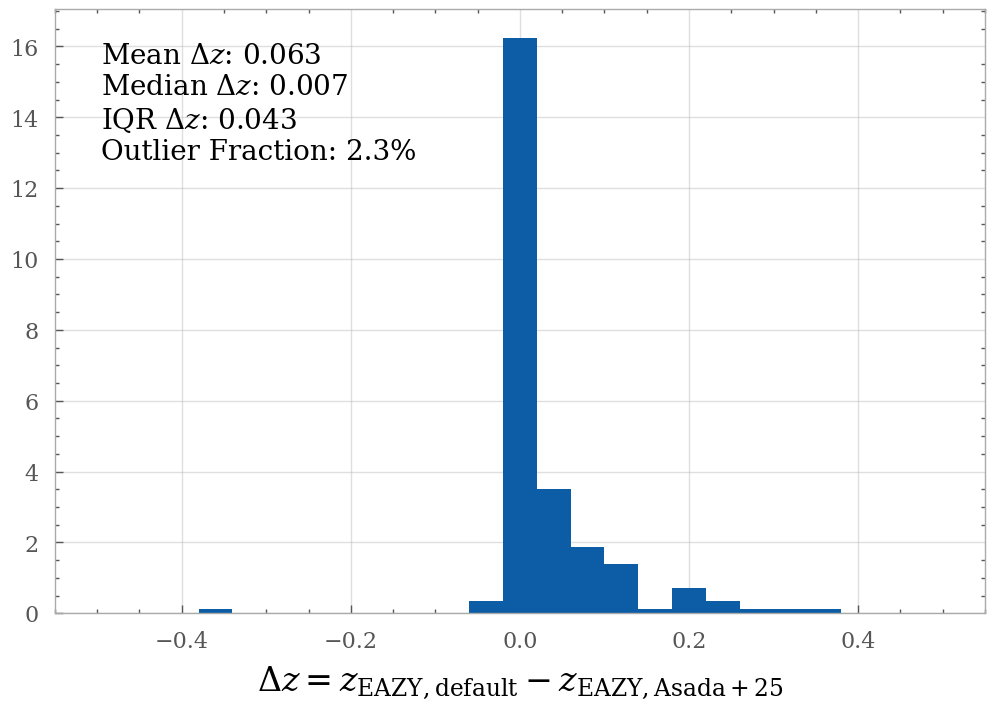

In [70]:
xs = []
ys = []

plt.figure(dpi=200)

for gal in galaxies:
    x = gal.meta_properties['zbest_fsps_larson_zfree']
    y = gal.interactive_outputs['MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm']['meta']['z_best']
    xs.append(x)
    ys.append(y)

x = np.array(xs)
y = np.array(ys)

plt.hist(x-y, bins=25, range=(-0.5, 0.5), density=True)

print(f"Mean difference: {np.mean(x-y):.3f}, Std: {np.std(x-y):.3f}")

print(f'Number with dz>0.5', np.sum(np.abs(x-y) > 0.5))

stats = f'''Mean $\Delta z$: {np.mean(x-y):.3f}
Median $\Delta z$: {np.median(x-y):.3f}
IQR $\Delta z$: {np.percentile(x-y, 75) - np.percentile(x-y, 25):.3f}
Outlier Fraction: {np.sum(np.abs(x-y)/y > 0.15)/len(x)*100:.1f}%
        '''

plt.xlabel(r'$\Delta z = z_{\rm EAZY, default} - z_{\rm EAZY, Asada+25}$')
plt.text(0.05, 0.7, stats, transform=plt.gca().transAxes, fontsize=10)

Select 5 galaxies with 0.2 dex mass offsets (more than normal) and rerun them through Bagpipes.
See how much masses change.

In [72]:
# Select the galaxies that are at deltz = 0.2

idxs = np.where((np.abs(x-y) > .15) & (np.abs(x-y) < .25))[0]

filtered_galaxies = galaxies[idxs]

filtered_galaxies = filtered_galaxies.filter_single_bins('voronoi')


override_meta = {
    "redshift": "MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm",
    "redshift_key": "zbest",
    "use_bpass": True,
    "name_append": "_zfix_eazy_cgm",
    "remove": ["redshift_sigma", "min_redshift_sigma"],
}

bagpipes_configs = create_dicts(
    continuity_dict, override_meta=override_meta, num=len(filtered_galaxies)
)

filtered_galaxies.run_bagpipes_parallel(
    bagpipes_configs
)

Overriding fit_photometry: all to "TOTAL_BIN"
Fitting photometry: TOTAL_BIN with run_name photoz_continuity_zfix_eazy_cgm
Using redshift from interactive outputs: MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm
Fitting fixed redshift = 8.339481353759766.
Fitting only TOTAL_BIN fluxes, which is 1 sources
Setup to use BPASS
Setup to use BPASS
Setup to use BPASS
Setup to use BPASS
Setup to use BPASS
Setup to use BPASS
Setup to use BPASS
Setup to use BPASS
Setup to use BPASS
Setup to use BPASS
Setup to use BPASS
Setup to use BPASS
Files already exist for 0.0 sources
Updating continuity bins
Overriding fit_photometry: all to "TOTAL_BIN"
Fitting photometry: TOTAL_BIN with run_name photoz_continuity_zfix_eazy_cgm
Using redshift from interactive outputs: MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm
Fitting fixed redshift = 8.683267593383789.
Fitting only TOTAL_BIN fluxes, which is 1 sources
Files already exist for 0.0 sources
Updating continuity bins
Overriding fit_photometry: all to 

KeyboardInterrupt: 

Run these test galaxies resolved fits

In [ ]:
override_meta_resolved = {
    "use_bpass": True,
    "run_name": "CNST_SFH_RESOLVED_VORONOI_Asada+24_zfix",
    "redshift": "MAG_APER_0_32 arcsec_fsps_larson_0_05__Asada24_cgm",
    "redshift_key": "zbest",
}

resolved_dicts_cnst = create_dicts(
    resolved_dict_cnst,
    num=len(filtered_galaxies),
    override_meta=override_meta_resolved,
)